Transfer_Learning_Modi_Vs_Trump


In [0]:
import os
import numpy as np
import pandas as pd
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
import keras
from keras.utils import to_categorical
import keras
from keras.applications import VGG16

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


Import Pretrained VGG16 Model

In [40]:
model = applications.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))






58892288/58889256 [==============================] - 2s 0us/step








Adding Layers on Pretrained VGG16 model

In [0]:
inp=model.output
x=Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='same',data_format='channels_last',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9))(inp)
x=MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last')(x)
x=Flatten()(x)
x=Dense(units=30,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(x)
x=Dense(units=15,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33))(x)
Out=Dense(units=2,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(x)
model1=Model(model.input,Out)


In [51]:
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Plot Model

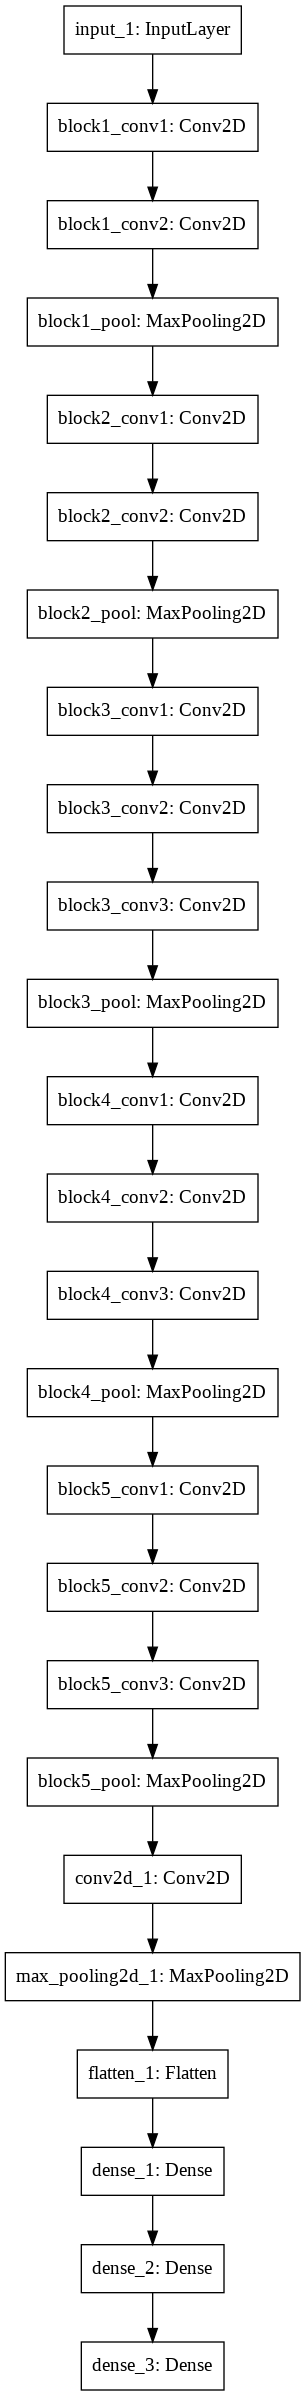

In [0]:
tf.keras.utils.plot_model(
model1,
to_file='model1.png',
show_shapes=False,
show_layer_names=True,
rankdir='TB',
expand_nested=False,
dpi=96
)


Make last 6 layers trainble only keep others False

In [0]:
for layer in model1.layers[:-6]:
  layer.trainable=False


In [43]:
for layer in model1.layers:
  print(layer,layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7fade5049eb8> False
<keras.layers.convolutional.Conv2D object at 0x7fade5049b70> False
<keras.layers.convolutional.Conv2D object at 0x7fade50492b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fade27ef4a8> False
<keras.layers.convolutional.Conv2D object at 0x7fade2827dd8> False
<keras.layers.convolutional.Conv2D object at 0x7fade506a630> False
<keras.layers.pooling.MaxPooling2D object at 0x7fade5071668> False
<keras.layers.convolutional.Conv2D object at 0x7fade5070a90> False
<keras.layers.convolutional.Conv2D object at 0x7fade4ff7ba8> False
<keras.layers.convolutional.Conv2D object at 0x7fade4ffba20> False
<keras.layers.pooling.MaxPooling2D object at 0x7fade5006278> False
<keras.layers.convolutional.Conv2D object at 0x7fade50049b0> False
<keras.layers.convolutional.Conv2D object at 0x7fade5013ac8> False
<keras.layers.convolutional.Conv2D object at 0x7fade5016828> False
<keras.layers.pooling.MaxPooling2D object at 0x7fade5026198>

Call Image Data Generator

In [0]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
horizontal_flip=True, fill_mode="nearest")


In [0]:
train_data_dir="/content/drive/My Drive/trumpvsmodi/train"
test_data_dir="/content/drive/My Drive/trumpvsmodi/test"

In [37]:
train_generator = datagen.flow_from_directory(
train_data_dir,
target_size = (224,224),
batch_size = 32,
class_mode = "categorical")


Found 363 images belonging to 2 classes.


In [39]:
test_generator = datagen.flow_from_directory(
test_data_dir,
target_size = (224,224),
batch_size = 32,
class_mode = "categorical")


Found 80 images belonging to 2 classes.


Compile Model

In [0]:
optimizer=optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-7,decay=0.0)

model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])



In [0]:

filepath="weights.best.hdf5"


Define Callbacks

In [0]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


Run model

In [62]:

history_object = model1.fit_generator(
train_generator,
samples_per_epoch = 363,
epochs = 50,
validation_data = test_generator,
nb_val_samples = 80,callbacks=[checkpoint,early])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=11, validation_steps=80)`
  import sys


Epoch 1/50
11/11 [==============================] - 30s 3s/step - loss: 0.1260 - acc: 0.9472 - val_loss: 0.2440 - val_acc: 0.9230

Epoch 00001: val_acc improved from -inf to 0.92304, saving model to weights.best.hdf5
Epoch 2/50
11/11 [==============================] - 30s 3s/step - loss: 0.0692 - acc: 0.9665 - val_loss: 0.2935 - val_acc: 0.9060

Epoch 00002: val_acc did not improve from 0.92304
Epoch 3/50
11/11 [==============================] - 30s 3s/step - loss: 0.0952 - acc: 0.9657 - val_loss: 0.2485 - val_acc: 0.9229

Epoch 00003: val_acc did not improve from 0.92304
Epoch 4/50
11/11 [==============================] - 31s 3s/step - loss: 0.0509 - acc: 0.9830 - val_loss: 0.1943 - val_acc: 0.9286

Epoch 00004: val_acc improved from 0.92304 to 0.92864, saving model to weights.best.hdf5
Epoch 5/50
11/11 [==============================] - 30s 3s/step - loss: 0.0800 - acc: 0.9606 - val_loss: 0.2123 - val_acc: 0.9258

Epoch 00005: val_acc did not improve from 0.92864
Epoch 6/50
11/11 [==

Predict on unseen image Data

In [0]:
def predict_fun(path):
  test_img=cv2.imread(path)
  test_img=cv2.resize(test_img,(224,224))
  img=np.expand_dims(test_img,axis=0)
  class_dictionary = {}
  class_dictionary[0] = 'This is an Prime Minister of India :honourable Narendra Modi '
  class_dictionary[1] = 'This is an President of USA :honourable Donald Trump'

  plt.imshow(test_img)
  plt.show()
  predict=model1.predict(img)
  predict_class=np.argmax(predict)
  predict_label=class_dictionary[predict_class]
  print(predict_label)


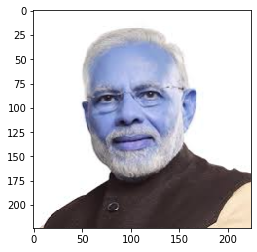

This is an Prime Minister of India :honourable Narendra Modi 


In [80]:
predict_fun("/content/images90.jpe")

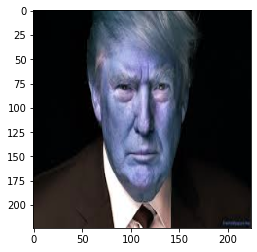

This is an President of USA :honourable Donald Trump


In [79]:
predict_fun("/content/download.jpe")